43 características totales (39 proteínas)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df = df.iloc[: -4, 2 : -1] # dropar columnas Patient ID, Sample ID e Histopatologia + dropar las últimas filas que no forman parte del dataset.

# Renombrar columnas eliminando las magnitudes entre paréntesis
columnas_nuevas = [col.split(' (')[0] for col in df.columns]

# Actualizar los nombres de las columnas en el DataFrame
df.columns = columnas_nuevas

In [22]:
df.shape

(1817, 44)

In [20]:
df.to_csv("dataset1.csv")

In [5]:
df.describe()

,Age,Omega_Score,AFP,Angiopoietin-2,AXL,CA-125,CA 15-3,CA19-9,CD44,CEA,...,Prolactin,sEGFR,sFas,SHBG,sHER2/sEGFR2/sErbB2,sPECAM-1,TGFa,Thrombospondin-2,TIMP-1,TIMP-2
count,1817.000000,1751.000000,1817.000000,1817.000000,1811.000000,1817.000000,1817.000000,1817.000000,1811.000000,1817.000000,...,1817.000000,1811.000000,1816.000000,1817.000000,1811.000000,1811.000000,1817.000000,1811.000000,1817.000000,1817.000000
mean,56.807925,4.439692,7109.350915,1908.423015,2367.282468,25.183043,20.628611,53.828772,19.533026,1858.076725,...,32313.975855,2206.283738,1390.840456,67.922256,5765.088272,5883.915544,28.108763,5502.450456,70058.422889,40261.117001
std,17.315452,21.161627,52353.921638,1814.768306,1369.702573,184.585378,64.345361,409.030952,11.341536,16139.112919,...,54139.458378,1214.316206,2354.800543,54.478992,4376.221802,2174.283827,283.264077,10204.121339,47577.490820,12970.481941
min,17.000000,0.000000,706.158000,38.391000,109.440000,4.608000,1.320000,14.214000,6.750000,1.001700,...,806.280000,197.580000,192.948000,1.500000,306.280000,219.830000,15.258000,482.140000,976.550000,15026.320000
25%,47.000000,0.710000,829.980000,997.490000,1479.425000,4.890000,7.110000,16.320000,11.960000,83.595900,...,8617.160000,1323.520000,206.334000,31.430000,4228.430000,4384.605000,16.200000,1145.100000,41231.360000,30752.350000
50%,60.000000,0.970000,946.938000,1498.920000,2136.610000,4.980000,12.180000,16.482000,16.760000,604.850000,...,14032.920000,2052.170000,1126.515000,53.350000,5261.220000,5499.780000,16.488000,2245.650000,59282.780000,37735.410000
75%,69.000000,1.320000,1848.540000,2259.460000,2931.680000,6.400000,19.840000,18.600000,23.795000,1062.120000,...,26552.970000,2906.490000,1803.705000,87.350000,6470.335000,7023.805000,16.698000,5673.605000,82928.930000,46794.540000
max,93.000000,333.230000,600608.892000,30001.791000,12247.310000,3600.024000,1177.446000,12491.472000,148.440000,337245.426000,...,608432.382000,8576.920000,61146.100000,478.840000,150848.100000,20178.170000,12018.864000,157461.070000,569512.690000,105748.640000


# Limpieza del dataset

### Análisis de Valores Nulos

In [6]:
df.isnull().sum()

Age                     0
Sex                     0
Race                    0
Omega_Score            66
AFP                     0
Angiopoietin-2          0
AXL                     6
CA-125                  0
CA 15-3                 0
CA19-9                  0
CD44                    6
CEA                     0
CYFRA 21-1              0
DKK1                    0
Endoglin                0
FGF2                    0
Follistatin             0
Galectin-3              0
G-CSF                   7
GDF15                   0
HE4                     0
HGF                     0
IL-6                    0
IL-8                    0
Kallikrein-6            6
Leptin                  0
Mesothelin              6
Midkine                 6
Myeloperoxidase         0
NSE                     0
OPG                     0
OPN                     0
PAR                     6
Prolactin               0
sEGFR                   6
sFas                    1
SHBG                    0
sHER2/sEGFR2/sErbB2     6
sPECAM-1    

In [7]:
OMEGA_SCORE_nulls = df[df['Omega_Score'].isnull()]
OMEGA_SCORE_nulls["Tumor type"].value_counts()

Tumor type
Normal        59
Colorectum     3
Stomach        2
Esophagus      1
Lung           1
Name: count, dtype: int64

In [8]:
# Sustituir los valores nulos en la columna 'Omega_Score' por la mediana de la columna. 
mediana_omega = df["Omega_Score"].median()
df['Omega_Score'] = df['Omega_Score'].fillna(mediana_omega)

In [9]:
columnas_con_nulos = [col for col in df.columns if df[col].isnull().any()]

In [10]:
for columna in columnas_con_nulos:
    mediana = df[columnas_con_nulos].median()  # Calcular la mediana ignorando nulos
    df[columnas_con_nulos] = df[columnas_con_nulos].fillna(mediana)  # Sustituir nulos por la mediana


In [11]:
df.isnull().sum()

Age                    0
Sex                    0
Race                   0
Omega_Score            0
AFP                    0
Angiopoietin-2         0
AXL                    0
CA-125                 0
CA 15-3                0
CA19-9                 0
CD44                   0
CEA                    0
CYFRA 21-1             0
DKK1                   0
Endoglin               0
FGF2                   0
Follistatin            0
Galectin-3             0
G-CSF                  0
GDF15                  0
HE4                    0
HGF                    0
IL-6                   0
IL-8                   0
Kallikrein-6           0
Leptin                 0
Mesothelin             0
Midkine                0
Myeloperoxidase        0
NSE                    0
OPG                    0
OPN                    0
PAR                    0
Prolactin              0
sEGFR                  0
sFas                   0
SHBG                   0
sHER2/sEGFR2/sErbB2    0
sPECAM-1               0
TGFa                   0


### Encontrar valores "UNKNOWN"

In [12]:
conteo_unknown_total = (df == 'Unknown').sum()

In [13]:
conteo_unknown_total

Age                      0
Sex                      0
Race                   193
Omega_Score              0
AFP                      0
Angiopoietin-2           0
AXL                      0
CA-125                   0
CA 15-3                  0
CA19-9                   0
CD44                     0
CEA                      0
CYFRA 21-1               0
DKK1                     0
Endoglin                 0
FGF2                     0
Follistatin              0
Galectin-3               0
G-CSF                    0
GDF15                    0
HE4                      0
HGF                      0
IL-6                     0
IL-8                     0
Kallikrein-6             0
Leptin                   0
Mesothelin               0
Midkine                  0
Myeloperoxidase          0
NSE                      0
OPG                      0
OPN                      0
PAR                      0
Prolactin                0
sEGFR                    0
sFas                     0
SHBG                     0
s

In [14]:
df["Race"].value_counts()

Race
Caucasian             1007
Asian                  323
Unknown                193
Black                  168
Hispanic                77
Caucasian/Hispanic      30
Black/Hispanic          14
Other                    5
Name: count, dtype: int64

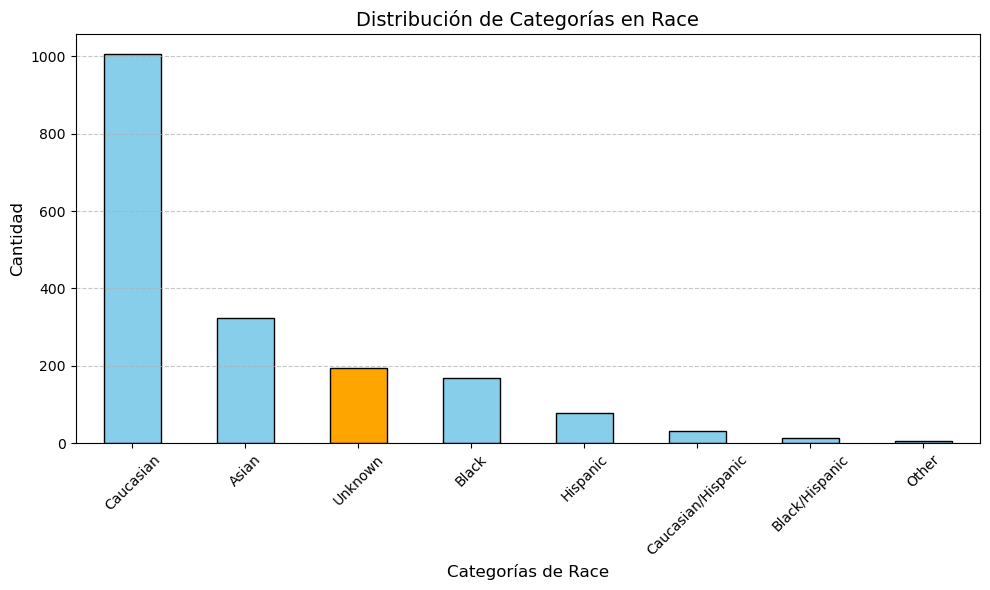

In [15]:
import matplotlib.pyplot as plt

# Contar las ocurrencias en la columna "Race"
conteo_race = df["Race"].value_counts()

# Colores para las barras (por defecto todas son azules)
colores = ['orange' if idx == 'Unknown' else 'skyblue' for idx in conteo_race.index]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
conteo_race.plot(kind='bar', color=colores, edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Categorías de Race', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.title('Distribución de Categorías en Race', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [16]:
import numpy as np

# Distribución de la muestra
distribucion = {
    'Caucasian': 1007,
    'Asian': 323,
    'Black': 168,
    'Hispanic': 77,
    'Caucasian/Hispanic': 30,
    'Black/Hispanic': 14,
    'Other': 5
}

# Calcular las probabilidades (normalizando las frecuencias)
total_conocido = sum(distribucion.values())
probabilidades = {k: v / total_conocido for k, v in distribucion.items()}

# Crear una lista ponderada para reemplazar
categorias = list(probabilidades.keys())
pesos = list(probabilidades.values())

# Reemplazar "Unknown" con muestreo aleatorio según la distribución
df['Race'] = df['Race'].apply(lambda x: np.random.choice(categorias, p=pesos) if x == 'Unknown' else x)

In [17]:
df["Race"].value_counts()

Race
Caucasian             1114
Asian                  367
Black                  188
Hispanic                94
Caucasian/Hispanic      35
Black/Hispanic          14
Other                    5
Name: count, dtype: int64

#### Not Available Ocurrencias

In [18]:
conteo_not_available = (df == 'NA').sum().sum()
conteo_not_available

0

## Tipos de tumores

#### Guardar la columna con las etiquetas del tipo de tumor para usar posteriormente.

In [19]:
tumor_type_column = df[["Tumor type"]]

In [20]:
tumor_type_column

,Tumor type
0,Colorectum
1,Colorectum
2,Colorectum
3,Colorectum
4,Colorectum
...,...
1812,Ovary
1813,Ovary
1814,Ovary
1815,Ovary


In [21]:
tumor_type_column.value_counts()

Tumor type
Normal        812
Colorectum    388
Breast        209
Lung          104
Pancreas       93
Stomach        68
Ovary          54
Esophagus      45
Liver          44
Name: count, dtype: int64

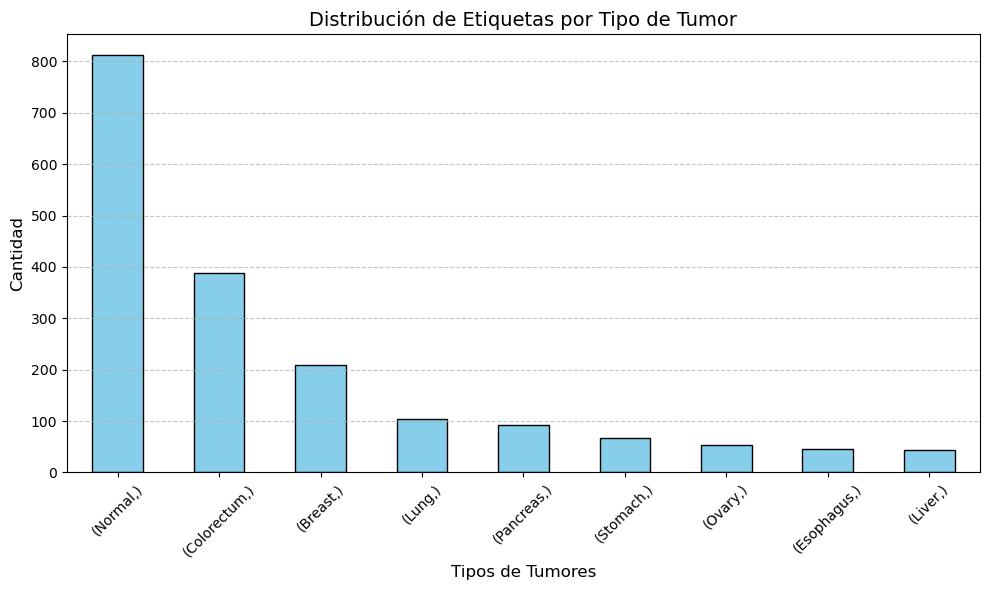

In [22]:
counts = tumor_type_column.value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Tipos de Tumores', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.title('Distribución de Etiquetas por Tipo de Tumor', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Clasificación Binaria de los pacientes

In [23]:
df['Tumor'] = df['Tumor type'].apply(lambda x: 0 if x == 'Normal' else 1)

In [24]:
df = df.drop(columns = "Tumor type")

In [25]:
df["Tumor"].value_counts()

Tumor
1    1005
0     812
Name: count, dtype: int64

## Histogramas

## Cambios

- #### Cambiar el idioma al ingles.

- #### Cambiar la leyenda booleano to ingles

- #### Características faltantes en el histograma: Sexo, Raza

- #### Redimensionar los ejes / bins para visualizar mejor la separación.

- #### Mediana específica

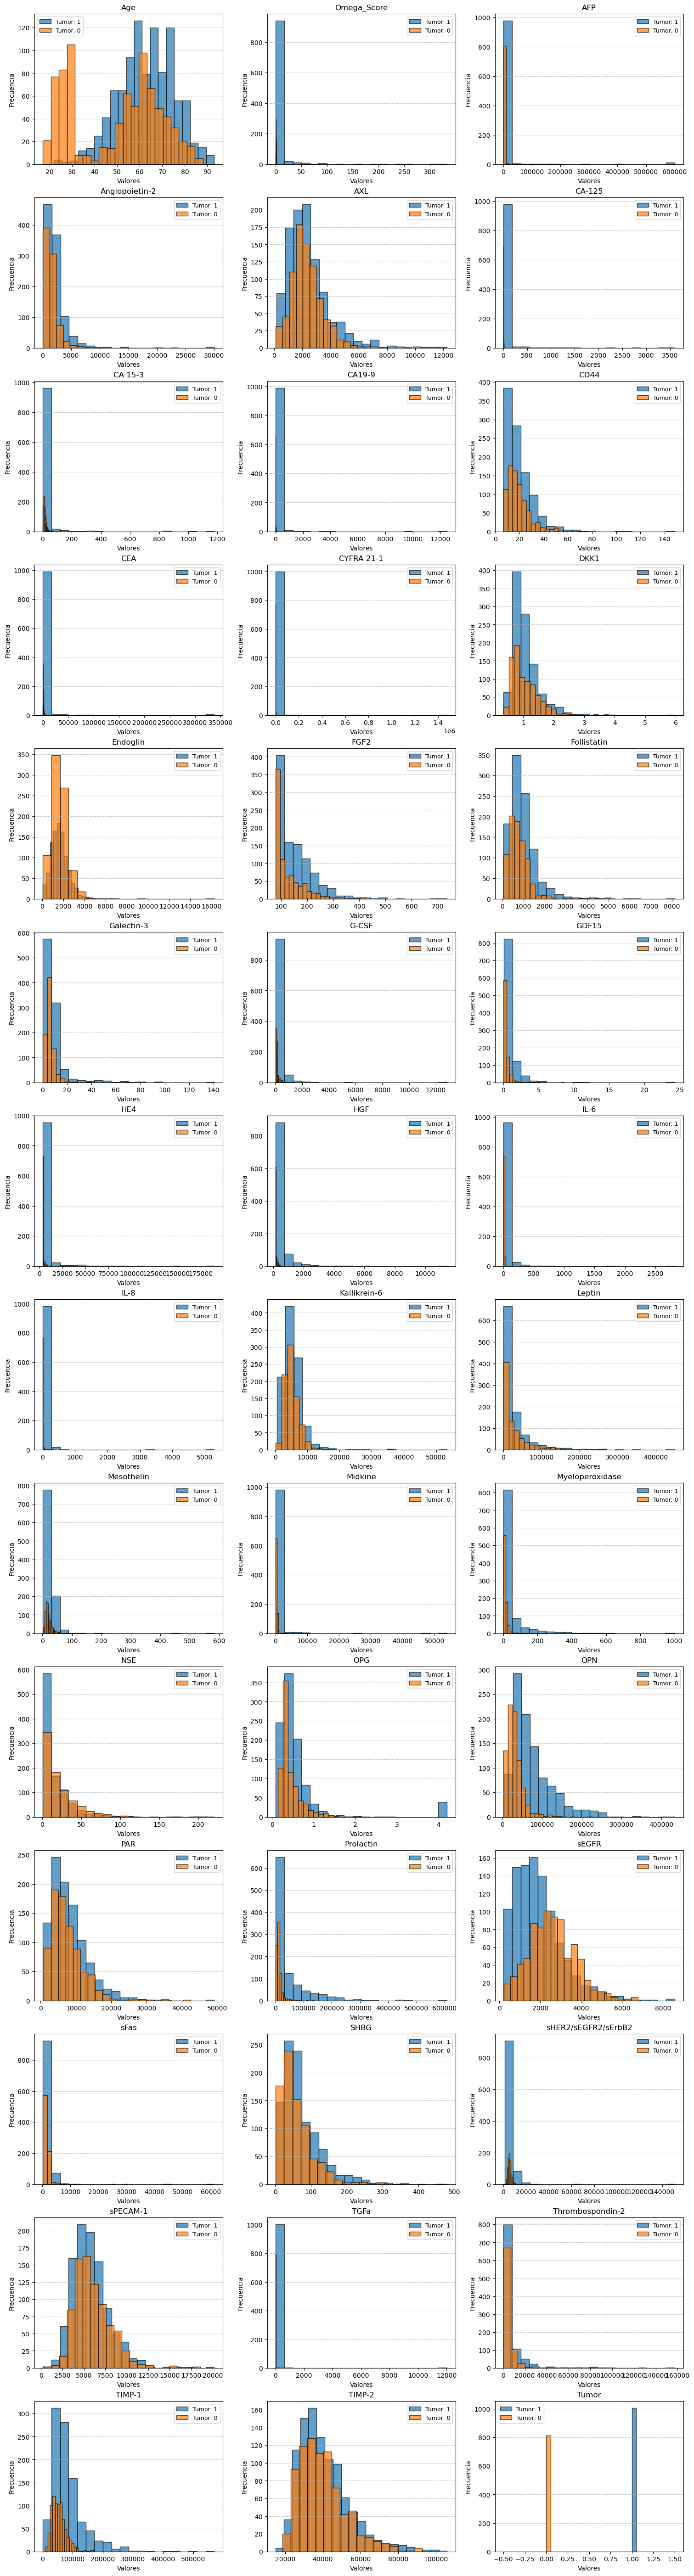

In [26]:
# Crear un grid de histogramas para todas las columnas numéricas
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns  # Seleccionar columnas numéricas
n_columnas = 3  # Número de columnas del grid (ajustable)
n_filas = -(-len(columnas_numericas) // n_columnas)  # Calcular filas (redondeo hacia arriba)

# Configuración del grid
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(15, n_filas * 4), constrained_layout=True)
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Definir colores para cada grupo en "Tumor"
grupos_tumor = df["Tumor"].unique()  # Obtener valores únicos
colores = plt.cm.tab10(range(len(grupos_tumor)))  # Colores generados automáticamente

# Crear un histograma para cada característica
for i, columna in enumerate(columnas_numericas):
    ax = axes[i]
    for j, grupo in enumerate(grupos_tumor):
        datos_grupo = df[df["Tumor"] == grupo][columna].dropna()
        ax.hist(datos_grupo, bins=20, color=colores[j], edgecolor='black', alpha=0.7, label=f'Tumor: {grupo}')
    ax.set_title(f'{columna}', fontsize=12)
    ax.set_xlabel('Valores', fontsize=10)
    ax.set_ylabel('Frecuencia', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(fontsize=9)  # Añadir leyenda para diferenciar colores

# Ocultar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Mostrar los histogramas
plt.show()

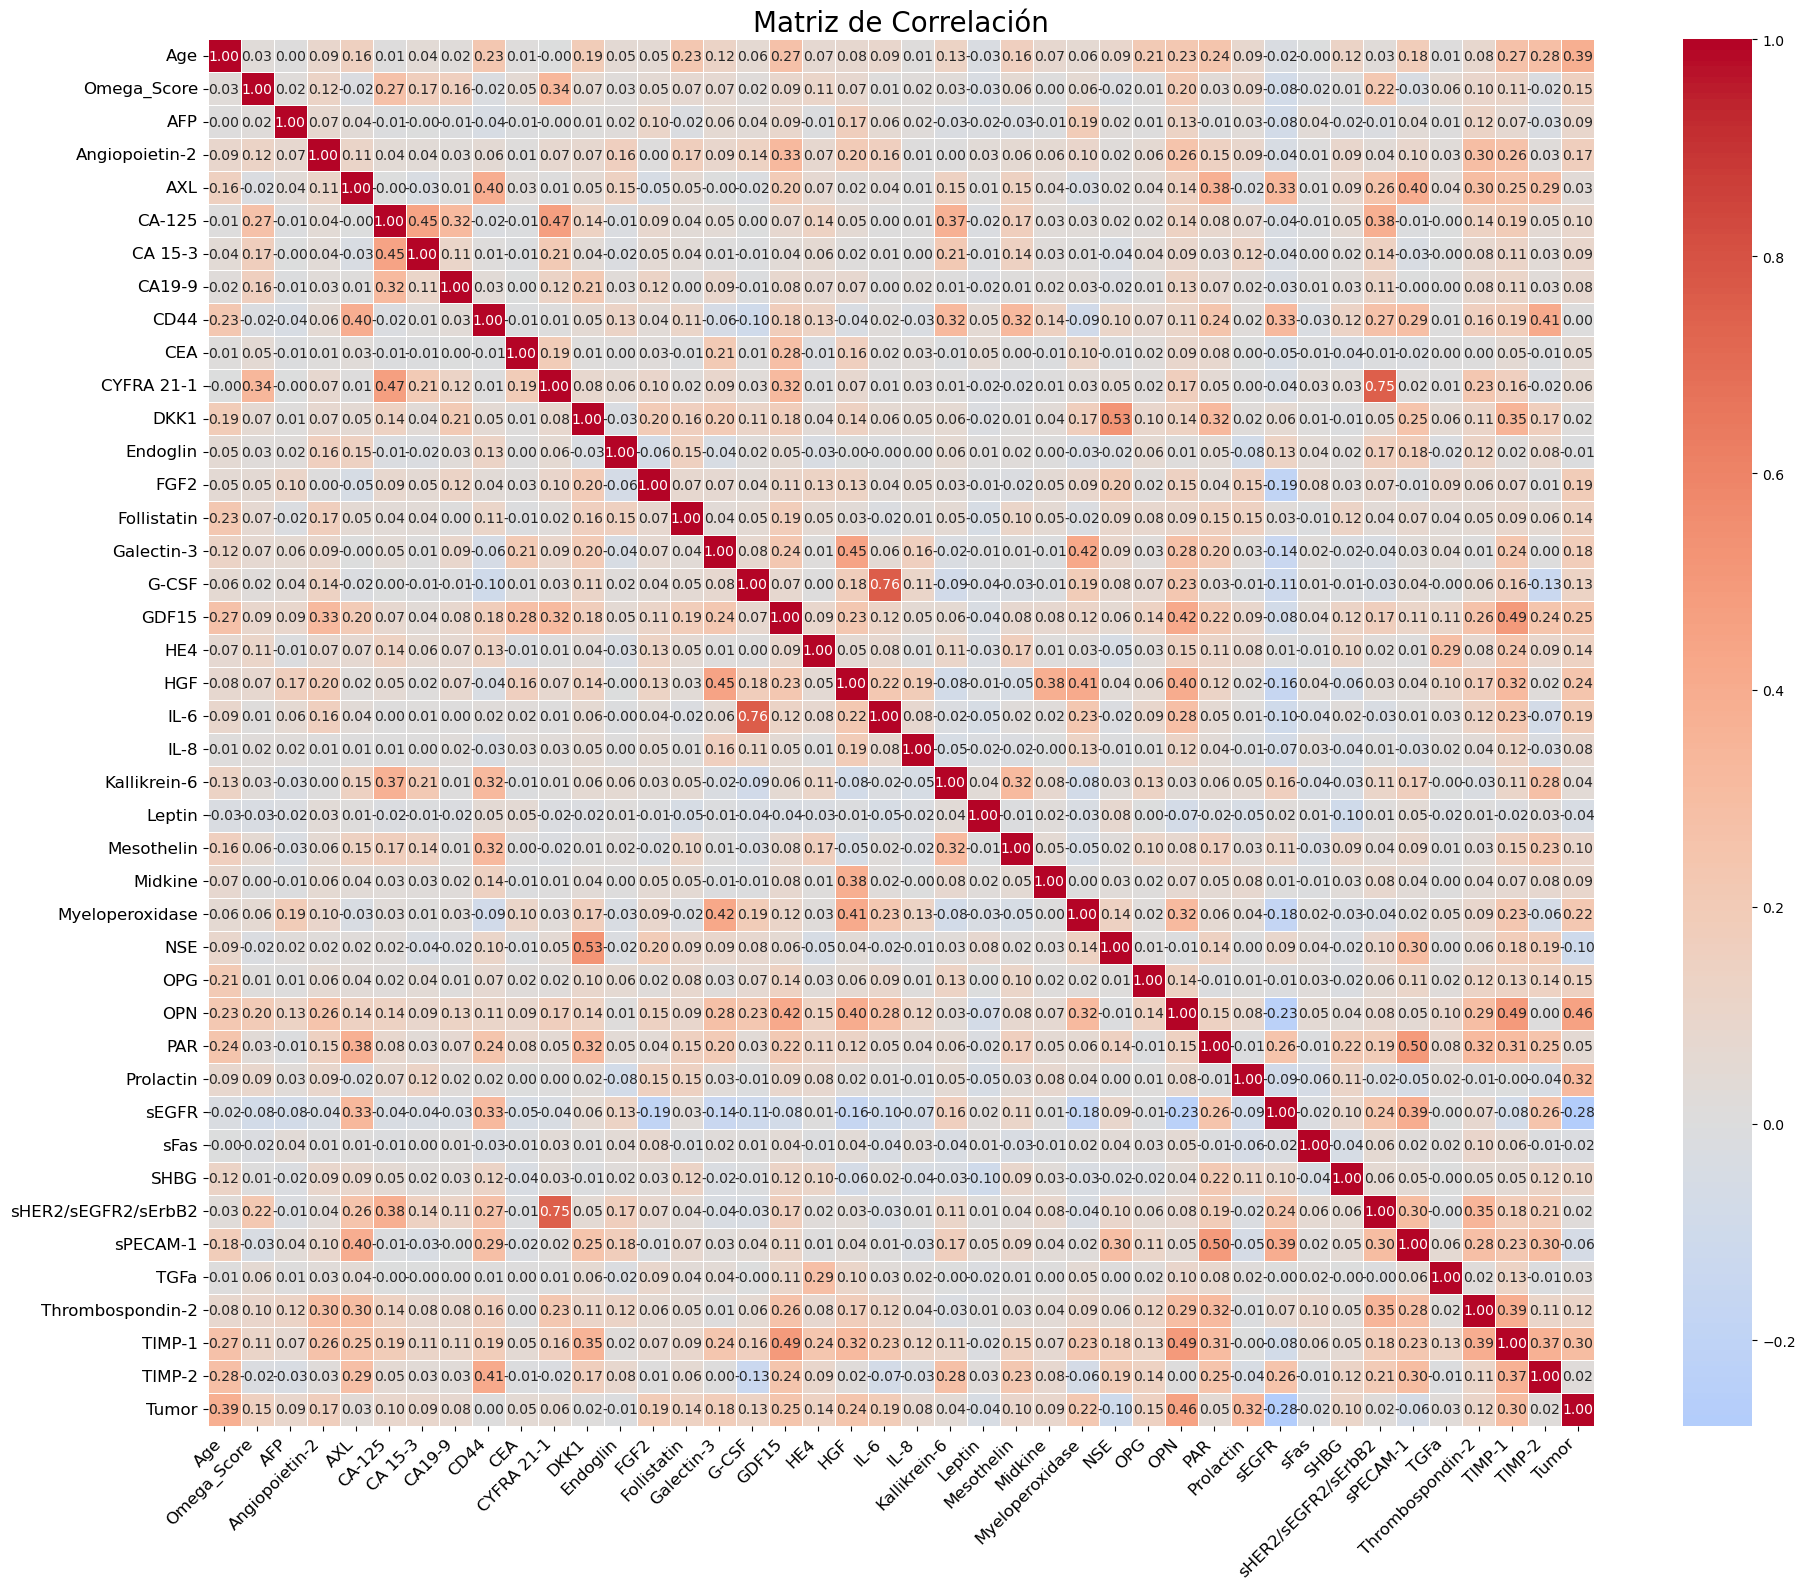

In [27]:
import seaborn as sns

# Seleccionar columnas numéricas
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
matriz_correlacion = df[columnas_numericas].corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(20, 16))

# Crear el mapa de calor con el color blanco centrado en 0
sns.heatmap(
    matriz_correlacion,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',  # Mapa de colores
    cbar=True,
    square=True,
    annot_kws={"size": 10},  # Ajuste del tamaño de las anotaciones
    linewidths=0.5,  # Espacio entre celdas
    center=0  # Centro del mapa de colores en 0
)

# Títulos y ajustes
plt.title('Matriz de Correlación', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Lista con las características

In [28]:
features = df.columns.tolist()

In [29]:
features

['Age',
 'Sex',
 'Race',
 'Omega_Score',
 'AFP',
 'Angiopoietin-2',
 'AXL',
 'CA-125',
 'CA 15-3',
 'CA19-9',
 'CD44',
 'CEA',
 'CYFRA 21-1',
 'DKK1',
 'Endoglin',
 'FGF2',
 'Follistatin',
 'Galectin-3',
 'G-CSF',
 'GDF15',
 'HE4',
 'HGF',
 'IL-6',
 'IL-8',
 'Kallikrein-6',
 'Leptin',
 'Mesothelin',
 'Midkine',
 'Myeloperoxidase',
 'NSE',
 'OPG',
 'OPN',
 'PAR',
 'Prolactin',
 'sEGFR',
 'sFas',
 'SHBG',
 'sHER2/sEGFR2/sErbB2',
 'sPECAM-1',
 'TGFa',
 'Thrombospondin-2',
 'TIMP-1',
 'TIMP-2',
 'Tumor']

## *Insertar una función que haga un conteode valores fuera de los intervalos min. y máximos de la técnica.

In [30]:
df

,Age,Sex,Race,Omega_Score,AFP,Angiopoietin-2,AXL,CA-125,CA 15-3,CA19-9,...,sEGFR,sFas,SHBG,sHER2/sEGFR2/sErbB2,sPECAM-1,TGFa,Thrombospondin-2,TIMP-1,TIMP-2,Tumor
0,60.0,Male,Caucasian,2.96,1583.450,5598.50,3621.04,5.090,19.08,16.452,...,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,1
1,59.0,Female,Caucasian,2.45,715.308,20936.35,2772.96,7.270,10.04,40.910,...,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,1
2,69.0,Female,Caucasian,1.22,4365.530,2350.93,4120.77,4.854,16.96,16.452,...,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,1
3,70.0,Female,Caucasian,1.64,715.308,1604.34,2029.96,5.390,8.31,16.452,...,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,1
4,43.0,Female,Caucasian,1.33,801.300,2087.57,2069.17,4.854,11.73,16.452,...,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,55.0,Female,Caucasian,0.98,879.498,1484.70,2096.76,24.820,10.30,42.390,...,2542.26,207.240,115.24,5390.31,8538.58,16.890,599.40,167799.61,50128.60,1
1813,57.0,Female,Caucasian,3.92,1337.330,1607.90,852.37,5.580,9.80,16.440,...,1670.22,207.240,147.17,7951.03,12966.19,16.890,599.40,123443.76,54066.98,1
1814,60.0,Female,Caucasian,7.96,879.498,1592.84,1044.45,30.480,8.48,16.440,...,1194.03,207.240,104.63,2396.36,1901.41,16.890,599.40,104070.89,39844.02,1
1815,49.0,Female,Caucasian,0.81,879.498,5267.95,1445.69,1469.450,23.74,62.260,...,1607.16,207.240,73.55,3079.81,5312.90,16.890,6864.33,110579.24,42921.13,1


FileNotFoundError: [Errno 2] No such file or directory: 'dataset'